In [17]:
import pandas as pd
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import LSTM,SimpleRNN,GRU
from keras.layers import LSTM,SimpleRNN,GRU
from keras.layers import Dropout,Dense
from keras.optimizers import Adam

# Step1:Loading the data

In [2]:
data = pd.read_csv('Dow2000-2009.csv')

In [3]:
cl = data.Close.values

In [4]:
cl.shape

(2514,)

In [5]:
scl = MinMaxScaler()
#Scale the data
cl = cl.reshape(cl.shape[0],1)
cl = scl.fit_transform(cl)
cl

array([[0.63150276],
       [0.58429817],
       [0.60067113],
       ...,
       [0.52511198],
       [0.52489276],
       [0.52529967]])

# Step 2: Cutting our time series into sequences

In [6]:
#Create a function to process the data into 7 day look back slices
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = processData(cl,7)

In [7]:
X

array([[0.63150276, 0.58429817, 0.60067113, ..., 0.65317001, 0.65968668,
        0.65166301],
       [0.58429817, 0.60067113, 0.61781714, ..., 0.65968668, 0.65166301,
        0.65691666],
       [0.60067113, 0.61781714, 0.65317001, ..., 0.65166301, 0.65691666,
        0.66102958],
       ...,
       [0.51263016, 0.51120188, 0.49376037, ..., 0.50765996, 0.51432753,
        0.51452585],
       [0.51120188, 0.49376037, 0.4964686 , ..., 0.51432753, 0.51452585,
        0.52156879],
       [0.49376037, 0.4964686 , 0.50765996, ..., 0.51452585, 0.52156879,
        0.52511198]])

In [8]:
X.shape[0]

2506

In [9]:
y

array([0.65691666, 0.66102958, 0.67948066, ..., 0.52156879, 0.52511198,
       0.52489276])

# Step 3: Cutting our time series into sequences

In [10]:
X_train,X_test = X[:2250],X[2250:]
y_train,y_test = y[:2250],y[2250:]

In [11]:

print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

2250
256
2250
256


# Step 4: Build and run an LSTM regression model

In [12]:
import time
import keras
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [13]:
time_callback = TimeHistory()

In [93]:
#Build the model
model = Sequential()
model.add(LSTM(64,input_shape=(7,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [94]:
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))

In [95]:
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=200,validation_data=(X_test,y_test),shuffle=False,callbacks=[time_callback])

Train on 2250 samples, validate on 256 samples
Epoch 1/200
2250/2250 [==============================] - 1s 393us/step - loss: 0.0215 - val_loss: 0.0027
Epoch 2/200
2250/2250 [==============================] - 0s 125us/step - loss: 0.0013 - val_loss: 0.0019
Epoch 3/200
2250/2250 [==============================] - 0s 123us/step - loss: 0.0014 - val_loss: 0.0015
Epoch 4/200
2250/2250 [==============================] - 0s 126us/step - loss: 0.0013 - val_loss: 0.0014
Epoch 5/200
2250/2250 [==============================] - 0s 124us/step - loss: 0.0012 - val_loss: 0.0014
Epoch 6/200
2250/2250 [==============================] - 0s 121us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 7/200
2250/2250 [==============================] - 0s 124us/step - loss: 0.0011 - val_loss: 0.0013
Epoch 8/200
2250/2250 [==============================] - 0s 130us/step - loss: 0.0011 - val_loss: 0.0013
Epoch 9/200
2250/2250 [==============================] - 0s 126us/step - loss: 0.0012 - val_loss: 0.0013
Epoch 10

2250/2250 [==============================] - 0s 160us/step - loss: 6.4103e-04 - val_loss: 5.7550e-04
Epoch 148/200
2250/2250 [==============================] - 0s 165us/step - loss: 6.3383e-04 - val_loss: 5.6058e-04
Epoch 149/200
2250/2250 [==============================] - 0s 170us/step - loss: 6.3389e-04 - val_loss: 5.6992e-04
Epoch 150/200
2250/2250 [==============================] - 0s 165us/step - loss: 6.2563e-04 - val_loss: 5.5580e-04
Epoch 151/200
2250/2250 [==============================] - 0s 172us/step - loss: 6.2471e-04 - val_loss: 5.5901e-04
Epoch 152/200
2250/2250 [==============================] - 0s 164us/step - loss: 6.1421e-04 - val_loss: 5.4345e-04
Epoch 153/200
2250/2250 [==============================] - ETA: 0s - loss: 6.1360e-0 - 0s 156us/step - loss: 6.1562e-04 - val_loss: 5.4910e-04
Epoch 154/200
2250/2250 [==============================] - 0s 184us/step - loss: 6.0905e-04 - val_loss: 5.4039e-04
Epoch 155/200
2250/2250 [==============================] - 0s 172u

In [96]:
training_time_lstm = time_callback.times

In [97]:
sum(training_time_lstm)

70.37408208847046

# Step 5: Checking model performance

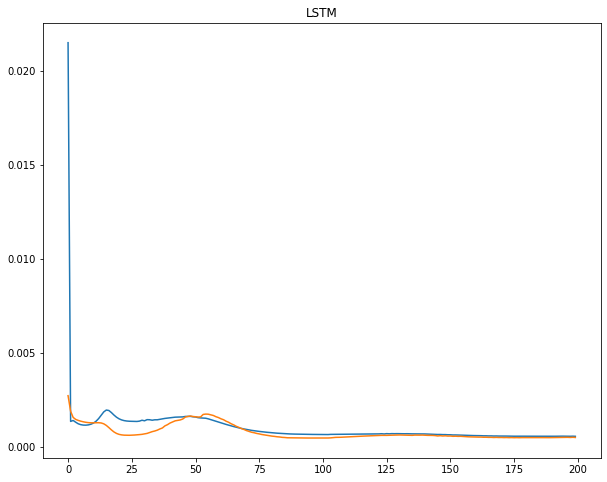

In [117]:
plt.figure(figsize = (10,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM')
plt.show()

In [99]:
X_test[0]

array([[0.27340141],
       [0.26484879],
       [0.31205723],
       [0.29895581],
       [0.27016025],
       [0.26676282],
       [0.25896235]])

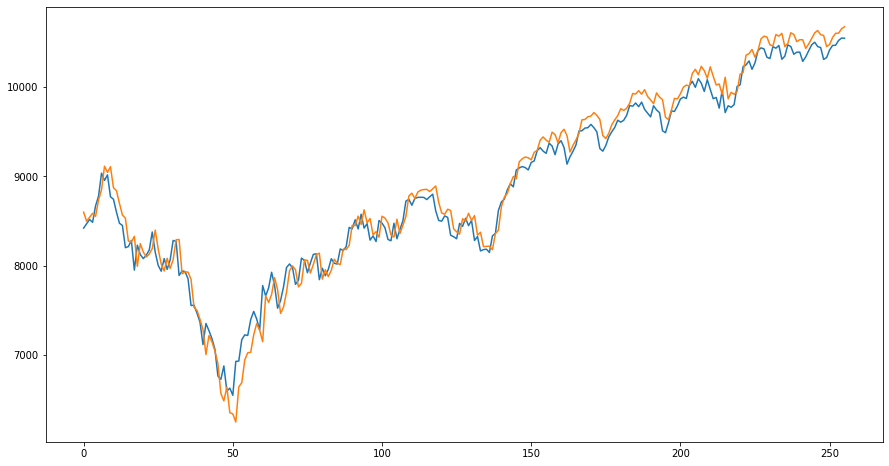

In [100]:
Xt = model.predict(X_test)
fig, ax = plt.subplots(figsize=(15, 8))
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))

In [101]:
valid = scl.inverse_transform(y_test.reshape(-1,1))

In [102]:
closing_price=scl.inverse_transform(Xt)

In [103]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))

In [104]:
rms

167.08124907698422

In [105]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(valid,closing_price)

130.75557895581056

In [106]:
from sklearn.metrics import r2_score
r2_score(valid,closing_price)

0.9718217883420035

In [60]:
act = []
pred = []
#for i in range(250):
i=249
Xt = model.predict(X_test[i].reshape(1,7,1))
print('predicted:{0}, actual:{1}'.format(scl.inverse_transform(Xt),scl.inverse_transform(y_test[i].reshape(-1,1))))
pred.append(scl.inverse_transform(Xt))
act.append(scl.inverse_transform(y_test[i].reshape(-1,1)))

predicted:[[10459.422]], actual:[[10328.889648]]


In [61]:
result_df = pd.DataFrame({'pred':list(np.reshape(pred, (-1))),'act':list(np.reshape(act, (-1)))})

In [62]:
#result_df.plot(kind='line')

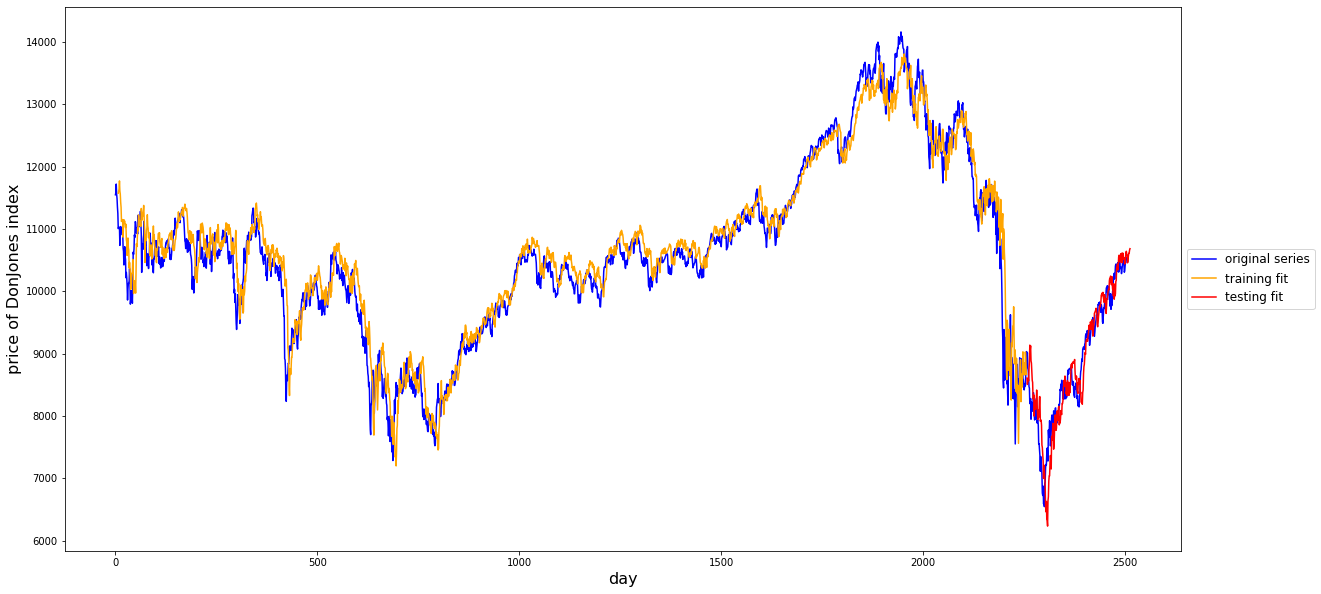

In [63]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(scl.inverse_transform(y.reshape(-1,1)), color='b')

Xtrain = model.predict(X_train)
Xtest = model.predict(X_test)

# plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
split_pt = 2250 + 7 # window_size
plt.plot(np.arange(7,split_pt,1), scl.inverse_transform(Xtrain), color='orange')
plt.plot(np.arange(split_pt,split_pt+len(Xtest),1), scl.inverse_transform(Xtest), color='r')

# pretty up graph
plt.xlabel('day',fontsize=16)
plt.ylabel('price of DonJones index',fontsize=16)
plt.legend(['original series','training fit','testing fit'],loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 12})
plt.show()

In [64]:
X_test[249]

array([[0.49753984],
       [0.50656911],
       [0.51519006],
       [0.51906927],
       [0.51263016],
       [0.51120188],
       [0.49376037]])

In [65]:
X_test[248]

array([[0.4908342 ],
       [0.49753984],
       [0.50656911],
       [0.51519006],
       [0.51906927],
       [0.51263016],
       [0.51120188]])

# Step 6: Build and run an RNN model

In [74]:
#Build the model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64,input_shape=(7,1)))
model_rnn.add(Dense(1))
model_rnn.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history_rnn = model_rnn.fit(X_train,y_train,epochs=200,validation_data=(X_test,y_test),shuffle=False,callbacks=[time_callback])

Train on 2250 samples, validate on 256 samples
Epoch 1/200
2250/2250 [==============================] - 0s 218us/step - loss: 0.0247 - val_loss: 0.0020
Epoch 2/200
2250/2250 [==============================] - 0s 77us/step - loss: 0.0041 - val_loss: 0.0016
Epoch 3/200
2250/2250 [==============================] - 0s 64us/step - loss: 0.0033 - val_loss: 0.0015
Epoch 4/200
2250/2250 [==============================] - 0s 64us/step - loss: 0.0028 - val_loss: 0.0013
Epoch 5/200
2250/2250 [==============================] - 0s 64us/step - loss: 0.0025 - val_loss: 0.0012
Epoch 6/200
2250/2250 [==============================] - 0s 63us/step - loss: 0.0021 - val_loss: 0.0010
Epoch 7/200
2250/2250 [==============================] - 0s 62us/step - loss: 0.0018 - val_loss: 8.8210e-04
Epoch 8/200
2250/2250 [==============================] - 0s 62us/step - loss: 0.0016 - val_loss: 7.8199e-04
Epoch 9/200
2250/2250 [==============================] - 0s 65us/step - loss: 0.0014 - val_loss: 7.0531e-04
Epoc

Epoch 74/200
2250/2250 [==============================] - 0s 59us/step - loss: 4.2625e-04 - val_loss: 5.4274e-04
Epoch 75/200
2250/2250 [==============================] - 0s 56us/step - loss: 4.1216e-04 - val_loss: 5.2903e-04
Epoch 76/200
2250/2250 [==============================] - 0s 57us/step - loss: 4.3414e-04 - val_loss: 5.4432e-04
Epoch 77/200
2250/2250 [==============================] - 0s 56us/step - loss: 4.1975e-04 - val_loss: 5.3459e-04
Epoch 78/200
2250/2250 [==============================] - 0s 61us/step - loss: 4.3633e-04 - val_loss: 5.5122e-04
Epoch 79/200
2250/2250 [==============================] - 0s 57us/step - loss: 4.4056e-04 - val_loss: 5.6746e-04
Epoch 80/200
2250/2250 [==============================] - 0s 60us/step - loss: 4.4086e-04 - val_loss: 5.9153e-04
Epoch 81/200
2250/2250 [==============================] - 0s 60us/step - loss: 4.5387e-04 - val_loss: 5.9220e-04
Epoch 82/200
2250/2250 [==============================] - 0s 60us/step - loss: 3.9898e-04 - val_

Epoch 146/200
2250/2250 [==============================] - 0s 78us/step - loss: 4.3789e-04 - val_loss: 6.6279e-04
Epoch 147/200
2250/2250 [==============================] - 0s 74us/step - loss: 4.2375e-04 - val_loss: 6.4617e-04
Epoch 148/200
2250/2250 [==============================] - 0s 71us/step - loss: 4.3734e-04 - val_loss: 6.5968e-04
Epoch 149/200
2250/2250 [==============================] - 0s 73us/step - loss: 4.2904e-04 - val_loss: 6.1566e-04
Epoch 150/200
2250/2250 [==============================] - 0s 75us/step - loss: 4.3975e-04 - val_loss: 6.2407e-04
Epoch 151/200
2250/2250 [==============================] - 0s 69us/step - loss: 4.4182e-04 - val_loss: 6.3784e-04
Epoch 152/200
2250/2250 [==============================] - 0s 76us/step - loss: 4.5006e-04 - val_loss: 5.9456e-04
Epoch 153/200
2250/2250 [==============================] - 0s 88us/step - loss: 4.3611e-04 - val_loss: 5.9177e-04
Epoch 154/200
2250/2250 [==============================] - 0s 72us/step - loss: 4.3041e-

In [75]:
training_time_rnn = time_callback.times

In [76]:
sum(training_time_rnn)

30.335023641586304

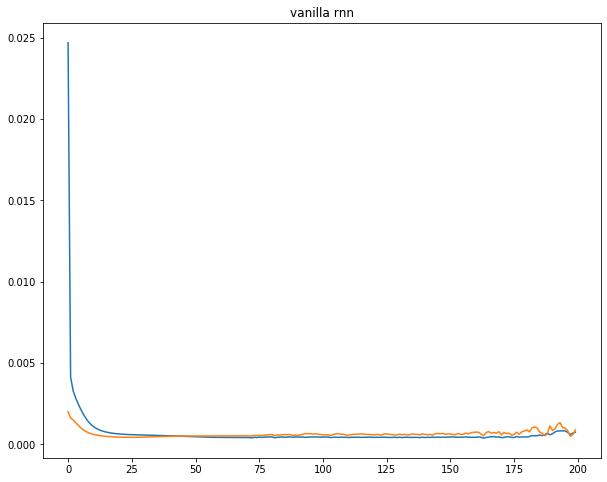

In [118]:
plt.figure(figsize = (10,8))
plt.plot(history_rnn.history['loss'])
plt.plot(history_rnn.history['val_loss'])
plt.title('vanilla rnn')
plt.show()

In [78]:
Xt_rnn = model_rnn.predict(X_test)

In [81]:
closing_price_rnn=scl.inverse_transform(Xt_rnn)

In [82]:
rms_rnn=np.sqrt(np.mean(np.power((valid-closing_price_rnn),2)))
rms_rnn

225.59227381663746

In [83]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(valid,closing_price_rnn)

176.75850104174805

In [84]:
from sklearn.metrics import r2_score
r2_score(valid,closing_price_rnn)

0.948630369293356

# Step 7: Build and run GRU model

In [108]:
#Build the model
model_gru = Sequential()
model_gru.add(GRU(64,input_shape=(7,1)))
model_gru.add(Dense(1))
model_gru.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history_gru = model_gru.fit(X_train,y_train,epochs=200,validation_data=(X_test,y_test),shuffle=False,callbacks=[time_callback])

Train on 2250 samples, validate on 256 samples
Epoch 1/200
2250/2250 [==============================] - 1s 529us/step - loss: 0.0332 - val_loss: 0.0090
Epoch 2/200
2250/2250 [==============================] - 0s 181us/step - loss: 0.0020 - val_loss: 0.0067
Epoch 3/200
2250/2250 [==============================] - 0s 171us/step - loss: 0.0018 - val_loss: 0.0045
Epoch 4/200
2250/2250 [==============================] - 0s 159us/step - loss: 0.0015 - val_loss: 0.0029
Epoch 5/200
2250/2250 [==============================] - 0s 166us/step - loss: 0.0013 - val_loss: 0.0017
Epoch 6/200
2250/2250 [==============================] - 0s 163us/step - loss: 0.0010 - val_loss: 0.0011
Epoch 7/200
2250/2250 [==============================] - 0s 159us/step - loss: 8.8031e-04 - val_loss: 7.9282e-04
Epoch 8/200
2250/2250 [==============================] - 0s 184us/step - loss: 7.7384e-04 - val_loss: 6.6455e-04
Epoch 9/200
2250/2250 [==============================] - 0s 162us/step - loss: 7.0841e-04 - val_l

Epoch 73/200
2250/2250 [==============================] - 0s 204us/step - loss: 5.6078e-04 - val_loss: 2.9019e-04
Epoch 74/200
2250/2250 [==============================] - 0s 204us/step - loss: 5.5896e-04 - val_loss: 2.8944e-04
Epoch 75/200
2250/2250 [==============================] - 0s 202us/step - loss: 5.5769e-04 - val_loss: 2.8936e-04
Epoch 76/200
2250/2250 [==============================] - 0s 196us/step - loss: 5.5517e-04 - val_loss: 2.8932e-04
Epoch 77/200
2250/2250 [==============================] - 0s 200us/step - loss: 5.6182e-04 - val_loss: 2.8807e-04
Epoch 78/200
2250/2250 [==============================] - 0s 198us/step - loss: 5.6911e-04 - val_loss: 2.8947e-04
Epoch 79/200
2250/2250 [==============================] - 0s 198us/step - loss: 5.5880e-04 - val_loss: 2.8955e-04
Epoch 80/200
2250/2250 [==============================] - 0s 193us/step - loss: 5.5621e-04 - val_loss: 2.9038e-04
Epoch 81/200
2250/2250 [==============================] - 0s 198us/step - loss: 5.5516e-

In [109]:
training_time_gru = time_callback.times

In [110]:
sum(training_time_gru)

94.15459108352661

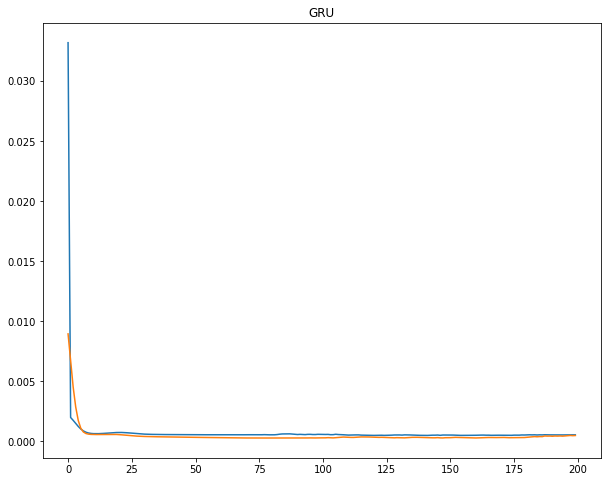

In [119]:
plt.figure(figsize = (10,8))
plt.plot(history_gru.history['loss'])
plt.plot(history_gru.history['val_loss'])
plt.title('GRU')
plt.show()

In [112]:
Xt_gru = model_gru.predict(X_test)

In [113]:
closing_price_gru=scl.inverse_transform(Xt_gru)

In [114]:
rms_gru=np.sqrt(np.mean(np.power((valid-closing_price_gru),2)))
rms_gru

169.94452390005952

In [115]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(valid,closing_price_gru)

138.4725017202149

In [116]:
from sklearn.metrics import r2_score
r2_score(valid,closing_price_gru)

0.9708477318432339